In [ ]:
import pandas as pd

todos_dados_final = pd.read_csv('C://fontes_dados//operacoes_credito//todos_dados_final.csv')

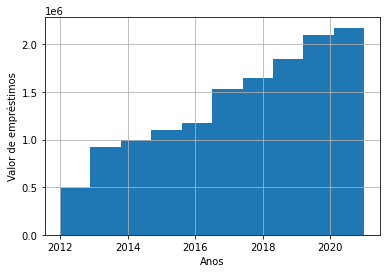

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

todos_dados_final.ano.hist(bins=10)
plt.xlabel("Anos")
plt.ylabel("Valor de empréstimos")
plt.show()

<ipython-input-22-9c8a2bd5a535>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')


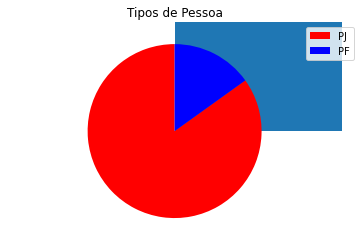

In [22]:
import colorsys

todos_dados_final.modalidade.hist(bins=10)
labels = todos_dados_final.cliente.value_counts().index
qtde_labels = len(todos_dados_final.carteira_ativa.value_counts().index)

#listaHSV = [(x*1.0/qtde_labels, 0.5, 0.5) for x in range(qtde_labels)]
#listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
listaRGB = ['red','blue']

fatias, texto = plt.pie(todos_dados_final.cliente.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title("Tipos de Pessoa")
#plt.figure(figsize=(16, 6))
plt.show()

In [9]:
todos_dados_final

,Unnamed: 0,data_base,uf,tcb,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,0,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Outros créditos,15,197769.70,2012,1
1,1,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,44589.70,2012,1
2,2,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,4453.96,2012,1
3,3,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo sem consignação em folha,15,37972.31,2012,1
4,4,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,18447.75,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
13989196,2175486,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,42058.36,2021,1
13989197,2175487,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,15325.74,2021,1
13989198,2175488,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro rotativo,15,10.58,2021,1
13989199,2175489,2021-01-30,TO,Cooperativas,PJ,-,PJ - Investimento,15,123221.52,2021,1


In [ ]:
todos_dados_final_novo = todos_dados_final.copy()

bins = [0, 20, 30, 40, 50, 60, 100]

todos_dados_final_novo.av

In [24]:
todos_dados_final.corr()

,Unnamed: 0,numero_de_operacoes,carteira_ativa,ano,mes
Unnamed: 0,1.000000,-0.002323,0.009567,0.442855,NaN
numero_de_operacoes,-0.002323,1.000000,0.348508,-0.006855,NaN
carteira_ativa,0.009567,0.348508,1.000000,0.014030,NaN
ano,0.442855,-0.006855,0.014030,1.000000,NaN
mes,NaN,NaN,NaN,NaN,NaN


In [26]:
del todos_dados_final['Unnamed: 0']

In [31]:
#A variável que descreve que as operações foram realizadas por cooperativas de crédito
#não é necessária porque todas são do mesmo tipo
del todos_dados_final['tcb']

#A variável cliente representa que se trata de uma pessoa física ou jurídica, para montar o modelo
#ela será substituída pelo domínio 1 = Pessoa Física (PF) e 2 = Pessoa Jurídica (PJ)
tipos_cliente = {'PF' : 1, 'PJ' : 2}
todos_dados_final['cliente'] = todos_dados_final['cliente'].map(tipos_cliente)
todos_dados_final

,data_base,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,2012-01-30,AC,1,PF - Aposentado/pensionista,PF - Outros créditos,15,197769.70,2012,1
1,2012-01-30,AC,1,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,44589.70,2012,1
2,2012-01-30,AC,1,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,4453.96,2012,1
3,2012-01-30,AC,1,PF - Aposentado/pensionista,PF - Empréstimo sem consignação em folha,15,37972.31,2012,1
4,2012-01-30,AC,1,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,18447.75,2012,1
...,...,...,...,...,...,...,...,...,...
13989196,2021-01-30,TO,2,-,PJ - Capital de giro,15,42058.36,2021,1
13989197,2021-01-30,TO,2,-,PJ - Capital de giro,15,15325.74,2021,1
13989198,2021-01-30,TO,2,-,PJ - Capital de giro rotativo,15,10.58,2021,1
13989199,2021-01-30,TO,2,-,PJ - Investimento,15,123221.52,2021,1


In [32]:
todos_dados_final['ocupacao'].unique()

array(['PF - Aposentado/pensionista', 'PF - Autônomo',
       'PF - Empregado de empresa privada',
       'PF - Empregado de entidades sem fins lucrativos',
       'PF - Empresário', 'PF - Outros',
       'PF - Servidor ou empregado público', '-', 'PF - MEI'],
      dtype=object)

In [42]:
todos_dados_final.query('ocupacao == "-"').count()


data_base              11877898
uf                     11877898
cliente                11877898
ocupacao               11877898
modalidade             11877898
numero_de_operacoes    11877898
carteira_ativa         11877898
ano                    11877898
mes                    11877898
dtype: int64

In [37]:
#Avaliandoa frequência em que o o valor '-' aparece para a variável ocupação
frequencia = todos_dados_final.groupby(['ocupacao']).count() 
print(frequencia)

                                                 data_base        uf  \
ocupacao                                                               
-                                                 11877898  11877898   
PF - Aposentado/pensionista                         244480    244480   
PF - Autônomo                                       311709    311709   
PF - Empregado de empresa privada                   316865    316865   
PF - Empregado de entidades sem fins lucrativos      79733     79733   
PF - Empresário                                     325371    325371   
PF - MEI                                            107907    107907   
PF - Outros                                         431972    431972   
PF - Servidor ou empregado público                  293266    293266   

                                                  cliente  modalidade  \
ocupacao                                                                
-                                                11877898    

In [43]:
#Tratando a variável que subdivide o tipo de cliente em uma classe de domínio e assumindo os
#valores: 
# 1 - PF - Aposentado/pensionista  
# 2 - PF - Autônomo 
# 3 - PF - Empregado de empresa privada 
# 4 - PF - Empregado de entidades sem fins lucrativos
# 5 - PF - Empresário
# 6 - PF - Outros
# 7 - PF - Servidor ou empregado público
# 8 - PF - MEI
# 9 - '-' Será considerada Classificação não informada

tipos_ocupacao = {'PF - Aposentado/pensionista' : 1,
                 'PF - Autônomo' : 2,
                 'PF - Empregado de empresa privada' : 3,
                 'PF - Empregado de entidades sem fins lucrativos' : 4,
                 'PF - Empresário' : 5,
                 'PF - Outros' : 6,
                 'PF - Servidor ou empregado público' : 7,
                 'PF - MEI' : 8,
                 '-' : 9 }

todos_dados_final['ocupacao'] = todos_dados_final['ocupacao'].map(tipos_ocupacao)
todos_dados_final



,data_base,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,2012-01-30,AC,1,1,PF - Outros créditos,15,197769.70,2012,1
1,2012-01-30,AC,1,1,PF - Empréstimo com consignação em folha,15,44589.70,2012,1
2,2012-01-30,AC,1,1,PF - Empréstimo com consignação em folha,15,4453.96,2012,1
3,2012-01-30,AC,1,1,PF - Empréstimo sem consignação em folha,15,37972.31,2012,1
4,2012-01-30,AC,1,1,PF - Empréstimo com consignação em folha,15,18447.75,2012,1
...,...,...,...,...,...,...,...,...,...
13989196,2021-01-30,TO,2,9,PJ - Capital de giro,15,42058.36,2021,1
13989197,2021-01-30,TO,2,9,PJ - Capital de giro,15,15325.74,2021,1
13989198,2021-01-30,TO,2,9,PJ - Capital de giro rotativo,15,10.58,2021,1
13989199,2021-01-30,TO,2,9,PJ - Investimento,15,123221.52,2021,1


In [44]:
todos_dados_final['modalidade'].unique()

array(['PF - Outros créditos', 'PF - Empréstimo com consignação em folha',
       'PF - Empréstimo sem consignação em folha', 'PF - Veículos',
       'PF - Cartão de crédito', 'PF - Rural e agroindustrial',
       'PJ - Capital de giro rotativo', 'PJ - Outros créditos',
       'PJ - Investimento', 'PJ - Capital de giro',
       'PJ - Operações com recebíveis',
       'PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos',
       'PJ - Rural e agroindustrial', 'PF - Habitacional'], dtype=object)

In [45]:
#Tratando a variável modalidade e estabelecendo o seguinte domínio
# 1  = PF - Outros créditos
# 2  = PF - Empréstimo com consignação em folha
# 3  = PF - Empréstimo sem consignação em folha
# 4  = PF - Veículos
# 5  = PF - Cartão de crédito
# 6  = PF - Rural e agroindustrial
# 7  = PJ - Capital de giro rotativo
# 8  = PJ - Outros créditos
# 9  = PJ - Investimento
# 10 = PJ - Capital de giro
# 11 = PJ - Operações com recebíveis,
# 12 = PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos
# 13 = PJ - Rural e agroindustrial
# 14 = PF - Habitacional
tipos_modalidade = {'PF - Outros créditos' : 1,
                     'PF - Empréstimo com consignação em folha' : 2,
                     'PF - Empréstimo sem consignação em folha' : 3,
                     'PF - Veículos' : 4,
                     'PF - Cartão de crédito' : 5,
                     'PF - Rural e agroindustrial' : 6,
                     'PJ - Capital de giro rotativo' : 7,
                     'PJ - Outros créditos' : 8,
                     'PJ - Investimento' : 9,
                     'PJ - Capital de giro' : 10,
                     'PJ - Operações com recebíveis' : 11,
                     'PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos' : 12,
                     'PJ - Rural e agroindustrial' : 13,
                     'PF - Habitacional' : 14}

todos_dados_final['modalidade'] = todos_dados_final['modalidade'].map(tipos_modalidade)
todos_dados_final




,data_base,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,2012-01-30,AC,1,1,1,15,197769.70,2012,1
1,2012-01-30,AC,1,1,2,15,44589.70,2012,1
2,2012-01-30,AC,1,1,2,15,4453.96,2012,1
3,2012-01-30,AC,1,1,3,15,37972.31,2012,1
4,2012-01-30,AC,1,1,2,15,18447.75,2012,1
...,...,...,...,...,...,...,...,...,...
13989196,2021-01-30,TO,2,9,10,15,42058.36,2021,1
13989197,2021-01-30,TO,2,9,10,15,15325.74,2021,1
13989198,2021-01-30,TO,2,9,7,15,10.58,2021,1
13989199,2021-01-30,TO,2,9,9,15,123221.52,2021,1


In [47]:
todos_dados_final.corr()

,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
cliente,1.000000,0.891232,0.802313,-0.127448,-0.109715,0.039524,NaN
ocupacao,0.891232,1.000000,0.714875,-0.093836,-0.089222,0.041352,NaN
modalidade,0.802313,0.714875,1.000000,-0.098510,-0.069009,0.002689,NaN
numero_de_operacoes,-0.127448,-0.093836,-0.098510,1.000000,0.348508,-0.006855,NaN
carteira_ativa,-0.109715,-0.089222,-0.069009,0.348508,1.000000,0.014030,NaN
ano,0.039524,0.041352,0.002689,-0.006855,0.014030,1.000000,NaN
mes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


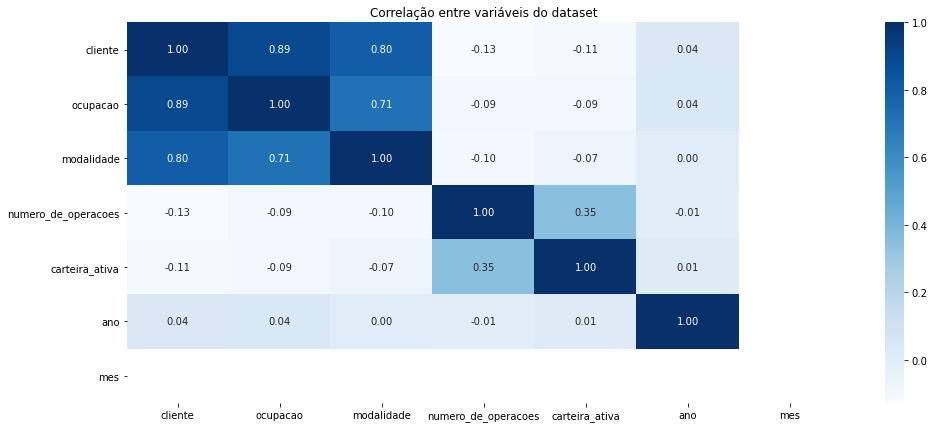

In [64]:
##Gerando um mapa de correlação em forma de gráfico para avaliar a relação entre as variáveis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))
sns.heatmap(todos_dados_final.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [49]:
del todos_dados_final['data_base']

In [55]:
analise_correlacao = todos_dados_final
#del analise_correlacao['uf']

In [60]:
todos_dados_final.to_csv('C://fontes_dados//operacoes_credito//todos_dados_final_2.csv')

In [1]:
import pandas as pd

todos_dados_final = pd.read_csv('C://fontes_dados//operacoes_credito//todos_dados_final_2.csv')

In [8]:
todos_dados_final.head()

,Unnamed: 0,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,0,AC,1,1,1,15,197769.70,2012,1
1,1,AC,1,1,2,15,44589.70,2012,1
2,2,AC,1,1,2,15,4453.96,2012,1
3,3,AC,1,1,3,15,37972.31,2012,1
4,4,AC,1,1,2,15,18447.75,2012,1


In [11]:
del todos_dados_final['Unnamed: 0']

<AxesSubplot:>

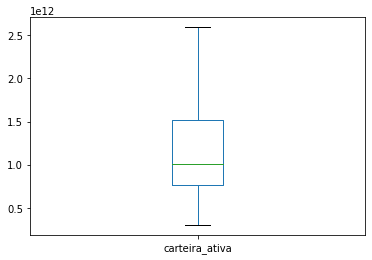

In [26]:
agrupados = pd.DataFrame(todos_dados_final.groupby('ano')['carteira_ativa'].sum())
agrupados.boxplot(column='carteira_ativa', grid = False)


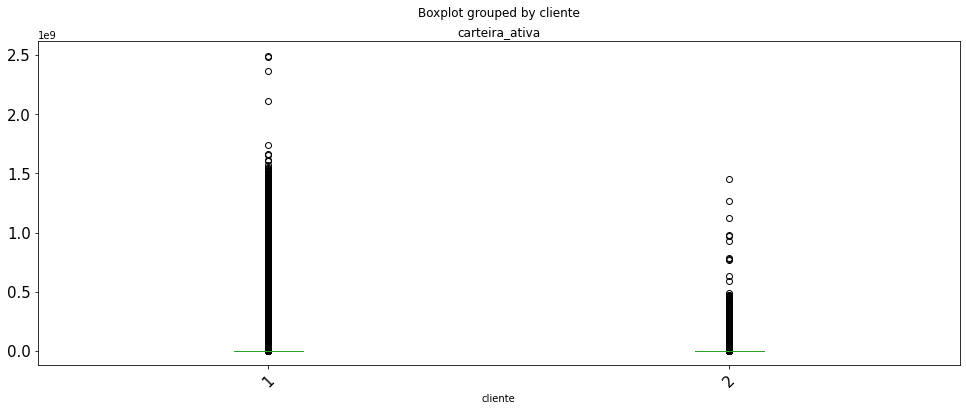

In [31]:
import matplotlib.pyplot as plt


boxplot = todos_dados_final.boxplot(column=['carteira_ativa'],by="cliente",grid=False, rot=45, fontsize=15,figsize =(16,6))
boxplot.plot()

plt.show()

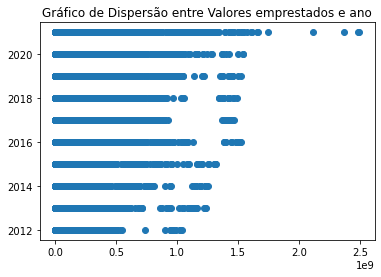

<Figure size 1080x1080 with 0 Axes>

In [34]:
valores = todos_dados_final['carteira_ativa']
ano = todos_dados_final['ano']

plt.scatter(valores, ano)
plt.title('Gráfico de Dispersão entre Valores emprestados e ano')
plt.figure(figsize=(15, 15))
plt.show()

In [37]:
todos_dados_final.describe()

,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
count,1.398920e+07,1.398920e+07,1.398920e+07,1.398920e+07,1.398920e+07,1.398920e+07,13989201.0
mean,1.849076e+00,8.304499e+00,8.158149e+00,7.560759e+01,8.592659e+05,2.017559e+03,1.0
std,3.579746e-01,1.850979e+00,2.628209e+00,7.659706e+02,1.034908e+07,2.672339e+00,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,3.600000e-01,2.012000e+03,1.0
25%,2.000000e+00,9.000000e+00,7.000000e+00,1.500000e+01,1.176852e+04,2.015000e+03,1.0
50%,2.000000e+00,9.000000e+00,9.000000e+00,1.500000e+01,5.196706e+04,2.018000e+03,1.0
75%,2.000000e+00,9.000000e+00,1.000000e+01,1.500000e+01,2.310265e+05,2.020000e+03,1.0
max,2.000000e+00,9.000000e+00,1.400000e+01,1.507930e+05,2.491590e+09,2.021000e+03,1.0


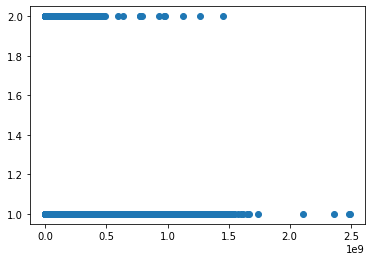

In [39]:
import matplotlib.pyplot as plt

X = todos_dados_final['carteira_ativa']
Y = todos_dados_final['cliente']
plt.scatter(X,Y)
plt.show()


In [40]:
todos_dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989201 entries, 0 to 13989200
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   uf                   object 
 1   cliente              int64  
 2   ocupacao             int64  
 3   modalidade           int64  
 4   numero_de_operacoes  int64  
 5   carteira_ativa       float64
 6   ano                  int64  
 7   mes                  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 853.8+ MB


In [49]:
#Avaliando operações concedidas para pessoas físicas x jurídicas
total_pf = len(todos_dados_final.loc[todos_dados_final['cliente'] == 1])
total_pj = len(todos_dados_final.loc[todos_dados_final['cliente'] == 2])

print("Total de operações para Pessoas Físicas: {0} ({1:2.2f}%)".format(total_pf, (total_pf / (total_pf + total_pj)) * 100))
print("Total de operações para Pessoas Jurídicas: {0} ({1:2.2f}%)".format(total_pj, (total_pj / (total_pj + total_pf)) * 100))

Total de operações para Pessoas Físicas: 2111303 (15.09%)
Total de operações para Pessoas Jurídicas: 11877898 (84.91%)


In [44]:
print(len(todos_dados_final['cliente'] == 2))

13989201


In [45]:
todos_dados_final['cliente'].unique()

array([1, 2], dtype=int64)

In [46]:
len(todos_dados_final)

13989201

In [47]:
todos_dados_final

,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,AC,1,1,1,15,197769.70,2012,1
1,AC,1,1,2,15,44589.70,2012,1
2,AC,1,1,2,15,4453.96,2012,1
3,AC,1,1,3,15,37972.31,2012,1
4,AC,1,1,2,15,18447.75,2012,1
...,...,...,...,...,...,...,...,...
13989196,TO,2,9,10,15,42058.36,2021,1
13989197,TO,2,9,10,15,15325.74,2021,1
13989198,TO,2,9,7,15,10.58,2021,1
13989199,TO,2,9,9,15,123221.52,2021,1


In [36]:
dados_ml = pd.read_csv('C://fontes_dados//operacoes_credito//todos_dados_final_2.csv')

In [12]:
dados_ml = dados_ml.set_index('ano')

In [16]:
dados_ml.columns
#del dados_ml["Unnamed: 0"]

Index(['uf', 'cliente', 'ocupacao', 'modalidade', 'numero_de_operacoes',
       'carteira_ativa', 'mes'],
      dtype='object')

In [17]:
dados_ml.index

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='ano', length=13989201)

In [31]:
dados_ml.describe()

,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,mes
count,1.398920e+07,1.398920e+07,1.398920e+07,1.398920e+07,1.398920e+07,13989201.0
mean,1.849076e+00,8.304499e+00,8.158149e+00,7.560759e+01,8.592659e+05,1.0
std,3.579746e-01,1.850979e+00,2.628209e+00,7.659706e+02,1.034908e+07,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,3.600000e-01,1.0
25%,2.000000e+00,9.000000e+00,7.000000e+00,1.500000e+01,1.176852e+04,1.0
50%,2.000000e+00,9.000000e+00,9.000000e+00,1.500000e+01,5.196706e+04,1.0
75%,2.000000e+00,9.000000e+00,1.000000e+01,1.500000e+01,2.310265e+05,1.0
max,2.000000e+00,9.000000e+00,1.400000e+01,1.507930e+05,2.491590e+09,1.0


In [33]:
del dados_ml['mes']

In [34]:
dados_ml

,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa
ano,,,,,,
2012,AC,1,1,1,15,197769.70
2012,AC,1,1,2,15,44589.70
2012,AC,1,1,2,15,4453.96
2012,AC,1,1,3,15,37972.31
2012,AC,1,1,2,15,18447.75
...,...,...,...,...,...,...
2021,TO,2,9,10,15,42058.36
2021,TO,2,9,10,15,15325.74
2021,TO,2,9,7,15,10.58


In [37]:
#Separando as variáveis de interesse
x = dados_ml[['ano','numero_de_operacoes']]


,carteira_ativa,ano,numero_de_operacoes
0,197769.70,2012,15
1,44589.70,2012,15
2,4453.96,2012,15
3,37972.31,2012,15
4,18447.75,2012,15
...,...,...,...
13989196,42058.36,2021,15
13989197,15325.74,2021,15
13989198,10.58,2021,15
13989199,123221.52,2021,15


In [38]:
#Conjunto de testes
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, dados_ml.carteira_ativa, test_size = 0.3)


In [40]:
x_train.shape, y_train.shape

((9792440, 3), (9792440,))

In [41]:
x_test.shape, y_test.shape

((4196761, 3), (4196761,))

In [42]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [44]:
#Processamento o treino
lreg.fit(x_train, y_train)

LinearRegression()

In [45]:
#Processando a predição
pred = lreg.predict(x_test)

In [47]:
#Erro medio quadratico
mse = np.mean((pred - y_test)**2)
mse

1.3020635146650396e-14

In [51]:
#Calculando os coeficientes
coeff = pd.DataFrame(x_train.columns)
coeff['Coeficientes'] = pd.Series(lreg.coef_)
coeff

,0,Coeficientes
0,carteira_ativa,1.000000e+00
1,ano,1.809512e-11
2,numero_de_operacoes,-3.733268e-16


In [52]:
#calculando o r-squared--- 100% de informação para cheqar ao resultado final
lreg.score(x_test, y_test)


1.0

In [ ]:
### https://www.youtube.com/watch?v=TZR-gR0QmnY  -- Pode ser útil
## Colocar para treino todo o dataframe original


<AxesSubplot:title={'center':'Modal Coefficients'}>

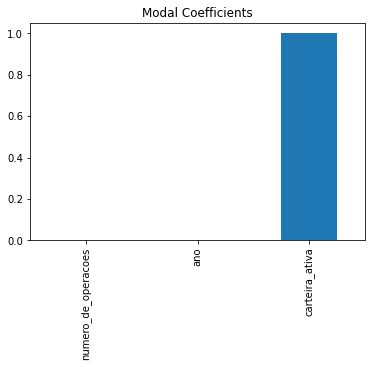

In [54]:
#Verificando a magnitude dos coeficientes
predictors = x_train.columns
coef = pd.Series(lreg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Modal Coefficients')

In [65]:
!pip install pyod

  Created wheel for pyod: filename=pyod-0.9.8-py3-none-any.whl size=136761 sha256=6a4e31a806a68a2d3b917cea13c338e3fb0f81a3e18abb2402a8d4036ded84a7
  Stored in directory: c:\users\mauro.ferreira\appdata\local\pip\cache\wheels\1c\3b\f6\0abfb384d3c5b855fdeacdc817a4374f924a90e583ceacb536
Successfully built pyod


In [66]:
todos_dados_final.head()

,uf,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa,ano,mes
0,AC,1,1,1,15,197769.70,2012,1
1,AC,1,1,2,15,44589.70,2012,1
2,AC,1,1,2,15,4453.96,2012,1
3,AC,1,1,3,15,37972.31,2012,1
4,AC,1,1,2,15,18447.75,2012,1


In [ ]:
from pyod.models.knn import KNN

detector = KNN()
detector.fit(todos_dados_final.iloc[:,1:6])

In [ ]:
previsoes = detector.labels_

In [ ]:
from pyod.models.knn import KNN

detector = KNN()
detector.fit(todos_dados_final['carteira_ativa'])
previsoes = detector.labels_
previsoes

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes